In [16]:
#scikit-learn을 별칭 sk로 임포트하는 코드를 작성하고 실행하세요
import sklearn as sk

In [17]:
#pandas를 별칭pd로 임포트하는 코드를 작성하고 실행하세요
import pandas as pd

In [104]:
#pandas함수로 데이터 파일을 읽어 dataframe변수(변수명 df)에 할당하는 코드를 작성하세요
df = pd.read_csv("nav_data.csv", encoding = 'cp949')

In [105]:
df.head()

,Time_Departure,Time_Arrival,Distance,Time_Driving,Speed_Per_Hour,Address1,Address2,Signaltype,Weekday,Hour,Day
0,35:21.0,55:22.6,12914,1201.534058,38.692536,경기도,광명시,7,0,5,20
1,55:22.0,09:06.9,7483,823.817017,32.699980,서울특별시,영등포구,31,0,5,20
2,13:46.0,22:32.9,8087,526.710998,55.273575,경기도,김포시,6,0,0,20
3,13:43.0,28:42.7,10528,898.581970,42.178456,경기도,광주시,2,0,0,20
4,01:57.0,17:58.2,10636,957.758972,39.978326,경기도,안산시 상록구,28,0,0,20


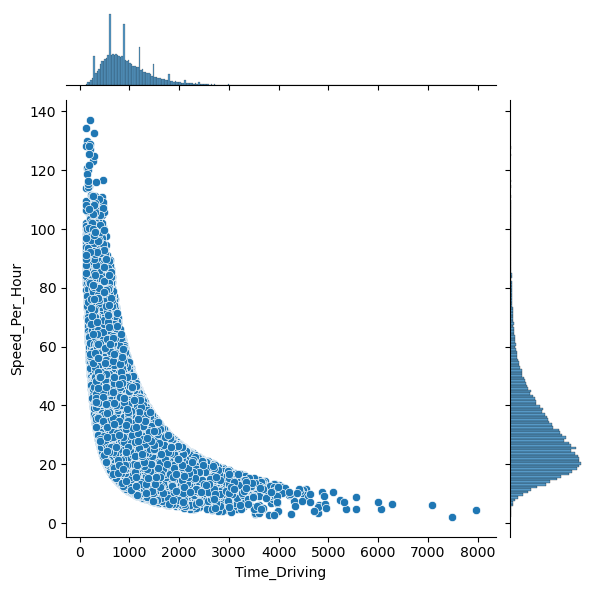

In [106]:
#실주행시간과 평균 시속의 분포를 같이 확인하려고합니다. Time_Driving과 Speed_Per_Hour을 jointplot으로 만드세요
import seaborn as sns
sns.jointplot(x = 'Time_Driving', y = 'Speed_Per_Hour', data = df)

In [107]:
#데이터간 상관계수를 구하여 heatmap 그래프로 시각화 해보세요.(annotation 포함)
df.corr()

,Distance,Time_Driving,Speed_Per_Hour,Signaltype,Weekday,Hour,Day
Distance,1.000000,0.530000,0.311770,0.239302,-0.022608,-0.037621,-0.022608
Time_Driving,0.530000,1.000000,-0.478222,0.530018,-0.007227,0.013728,-0.007227
Speed_Per_Hour,0.311770,-0.478222,1.000000,-0.391777,0.002364,-0.054872,0.002364
Signaltype,0.239302,0.530018,-0.391777,1.000000,-0.037167,-0.001802,-0.037167
Weekday,-0.022608,-0.007227,0.002364,-0.037167,1.000000,0.013949,1.000000
Hour,-0.037621,0.013728,-0.054872,-0.001802,0.013949,1.000000,0.013949
Day,-0.022608,-0.007227,0.002364,-0.037167,1.000000,0.013949,1.000000


<AxesSubplot:>

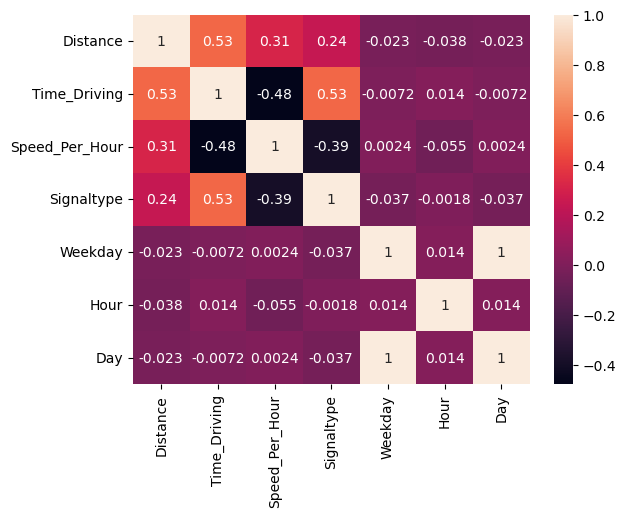

In [108]:
sns.heatmap(df.corr(), annot = True)

In [109]:
#불필요한 데이터를 삭제 처리하세요(Time_Departure컬럼을 삭제하세요. 결과를 df_temp데이터프레임에 저장하세요)
df_temp = df.drop(['Time_Departure', 'Time_Arrival'], axis = 1)

In [110]:
#scikit-learn의 encoder를 사용하여 범주형 데이터를 수치형 데이터로 변환하세요(주소컬럼,fit_transform활용) *
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_temp['Address1'] = le.fit_transform(df_temp['Address1'])
df_temp['Address2'] = le.fit_transform(df_temp['Address2'])

In [111]:
#원-핫 인코딩으로 컬럼 데이터를 1과 0의 이진형 벡터로 변환하세요(weekday,hour,day,address1,address2,get_dummies활용, drop_first = True) *
dumm_cols = ['Weekday', 'Hour', 'Day', 'Address1', 'Address2']

df_temp = pd.get_dummies(df_temp, columns = dumm_cols, drop_first = True)

In [112]:
#훈련과 검증 각각에 사용할 데이터셋을 분리하세요(y = Time_Driving, 7:3)
target = 'Time_Driving'

x = df_temp.drop(target, axis = 1)
y = df_temp.loc[:, target]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 1)

In [113]:
#StandardScaler를 사용하여 데이터 변수를 훈련데이터셋은 정규분포화(fit_transform),검증 데이터셋은 표준화(transform) 하세요
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
x_train_ss = scaler.fit_transform(x_train)
x_test_ss = scaler.transform(x_test)

In [114]:
#max depth = 5로 decision tree로 머신러닝 모델을 만들고 학습을 진행하세요
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import *
model = DecisionTreeRegressor(max_depth = 5)

model.fit(x_train_ss,y_train)

DecisionTreeRegressor(max_depth=5)

In [115]:
#머신러닝 모델에 대해 RMSE, R-squared 값 출력, scatter plot을 이용하여 x축에 실제 y값 및 y축에 예측값 시각화
y_pred = model.predict(x_test_ss)
print('RMSE : ', (mean_squared_error(y_test, y_pred))**0.5)
print('r2_score : ', r2_score(y_test, y_pred))

RMSE :  160.64076784567027
r2_score :  0.9051029648802413


<AxesSubplot:xlabel='Time_Driving'>

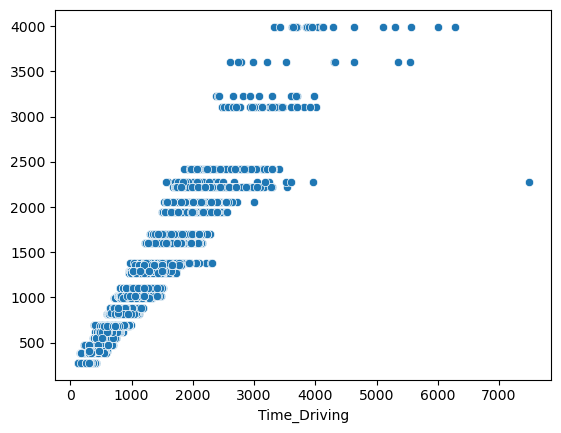

In [116]:
sns.scatterplot(x = y_test, y = y_pred)

In [ ]:
#딥러닝 모델을 만드세요)EarlyStopping, ModelCheckpoint 콜백 적용, validation performance가 좋은 모델을 best_model.h5 파일로 저장하기
import tensorflow as tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor = 'val_loss',
                   min_delta = 0,
                   patience = 5,
                   verbose = 1,
                   restore_best_weights = True)
mc = ModelCheckpoint('best_model.h5',
                     monitor = 'val_loss',
                     save_best_only = True,
                     verbose = 1)

In [ ]:
## Functional API

# 1 세션 클리어
keras.backend.clear_session()
# 2 레이어 사슬처럼 엮기
il = keras.layers.Input(shape=(117,))
hl = keras.layers.Dense(64, activation = 'relu')(il)
hl = keras.layers.Dense(32, activation = 'relu')(hl)
hl = keras.layers.Dense(16, activation = 'relu')(hl)
ol = keras.layers.Dense(1, activation='relu')(hl)
# 3 모델의 시작과 끝 지정
model = keras.models.Model(il, ol)
# 4 컴파일
model.compile(loss='mae', metrics=['mae'],
              optimizer='adam')

# 요약
model.summary()

In [ ]:
history = model.fit(x_train_ss,y_train,epochs = 1000,verbose = 1,callbacks = [es,mc], validation_data = (x_test_ss, y_test))

In [15]:
#딥러닝 모델 훈련데이터셋의 mae와 검증 데이터셋의 val_mae를 1개의 그래프에 표시하세요(mae,val_mae범례 표시, 그래프 타이틀 Training mae, x축 Epochs, y축, mae)
import matplotlib.pyplot as plt

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Training MAE')
plt.ylabel('mae')
plt.xlabel('Epochs')
plt.legend(['mae', 'val_mae'], loc='upper left')
plt.show()